<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Modulo02/Bootcamp_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploração dos dados do datasus 2008 pra frente


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Modulo02/dados/A104831189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows=3, sep = ";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9012840.42,9855249.57,9770992.43,14740022.40,15347858.07,16236293.19,15143679.18,12498710.53,10951319.46,1.073782e+09
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,4.752903e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56,21621697.26,26103808.87,23445832.76,23154039.32,26127701.15,26398054.09,24446286.12,21752718.52,2.041004e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,24954

In [3]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86092502.24,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08,1.200098e+08,1.119016e+08,1.343308e+08,1.445253e+08,1.473374e+08,1.515765e+08,1.534800e+08,137579124.29,1.350319e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17363192.43,1.885884e+07,1.987708e+07,1.924789e+07,1.949721e+07,2.202313e+07,1.979587e+07,2.197742e+07,2.531665e+07,2.609724e+07,2.695567e+07,2.888897e+07,3.434338e+07,3.167354e+07,36433854.87,2.485179e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15823328.54,15032737.51,15259436.50,15066106.66,1.490697e+07,12563655.61,13632848.78,13215428.53,1.683465e+07,1.970622e+07,2.074722e+07,2.272811e+07,2.069369e+07,1.997729e+07,1.948038e+07,1.906485e+07,2.428373e+07,3.093521e+07,3.178601e+07,3.295717e+07,3.803978e+07,36567362.69,2.356738e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.2

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 166 entries, Unidade da Federação to Total
dtypes: float64(163), object(3)
memory usage: 35.1+ KB


In [5]:
pd.options.display.float_format = "{:.2f}".format
media_meses = dados.mean()
media_meses

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Abr     72558458.73
2021/Mai     76781349.18
2021/Jun     80038897.67
2021/Jul     78895881.06
Total      6774438510.94
Length: 163, dtype: float64

In [6]:
dados["2008/Ago"]

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [7]:
dados["2008/Ago"].mean()

27800320.306666665

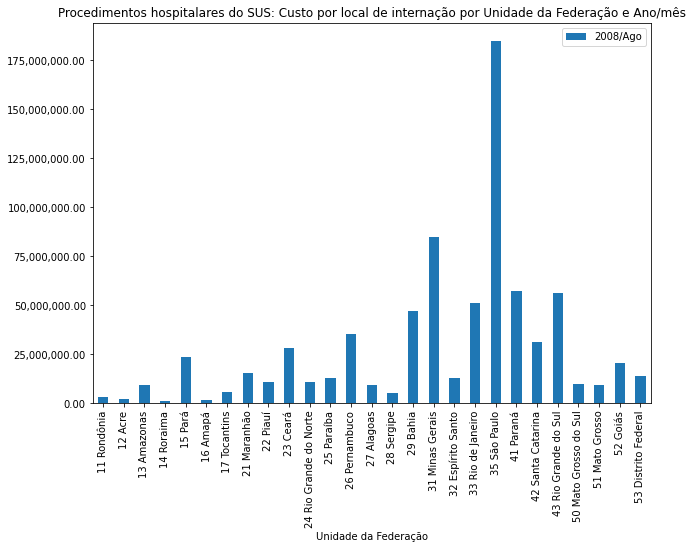

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago",kind="bar", figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
plt.show()

#Desafio: faça a mesma análise pro mês mais recente.

In [9]:
dados_ref = dados.replace('-', '0')
dados_ref = dados_ref.set_index("Unidade da Federação")
for i in dados_ref.columns:
  dados_ref[i] = dados_ref[i].astype(float)

dados_ref['2021/Ago'].mean()

69987437.27444446

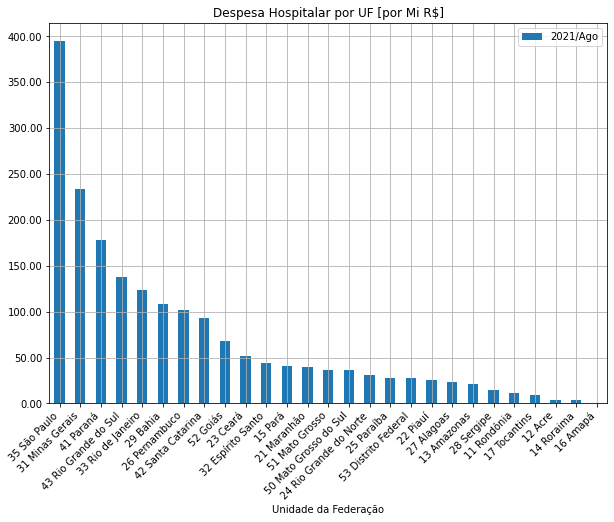

In [10]:
dados_ref_milhoes = dados_ref / 1e6
ax = dados_ref_milhoes.sort_values(by=['2021/Ago'], ascending = False).plot(
                                                                    y="2021/Ago",
                                                                    kind="bar", 
                                                                    figsize=(10,7),
                                                                    grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')
plt.title("Despesa Hospitalar por UF [por Mi R$]")
plt.show()

# Entendendo gráficos

In [11]:
dados2 = pd.read_csv("https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Modulo02/dados/A122541189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows=3, sep = ";", skipfooter=12,
                    thousands=".", decimal=",")
dados2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,2048596.72,1073782138.81
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,475290315.34
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,5780705.81,2041003727.86
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3531874.44,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3653281.61,3350272.96,2977820.70,1749906.81,349395453.66
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43336950.39,41046394.84,40533687.35,38864252.14,37003357.15,38507479.70,37228236.49,37925512.28,39040849.46,37112818.28,49596845.29,52394753.18,50486914.49,41805551.16,30176865.99,13008678.86,4950135530.02


In [12]:
dados2[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [13]:
dados2.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2021/Abr     77523160.28
2021/Mai     81401610.00
2021/Jun     67436298.31
2021/Jul     47452748.71
Total      6774431164.65
Length: 169, dtype: float64

In [14]:
colunas_usaveis = dados2.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [15]:
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,1073782138.81
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,475290315.34
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,2041003727.86
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.

In [16]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,1073782138.81
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,475290315.34
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,2041003727.86
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2844811.66,296

In [17]:
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [18]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Abr     5002272.59
2021/Mai     4326882.24
2021/Jun     3458187.11
2021/Jul     2302711.01
Total      475290315.34
Name: 12 Acre, Length: 169, dtype: float64

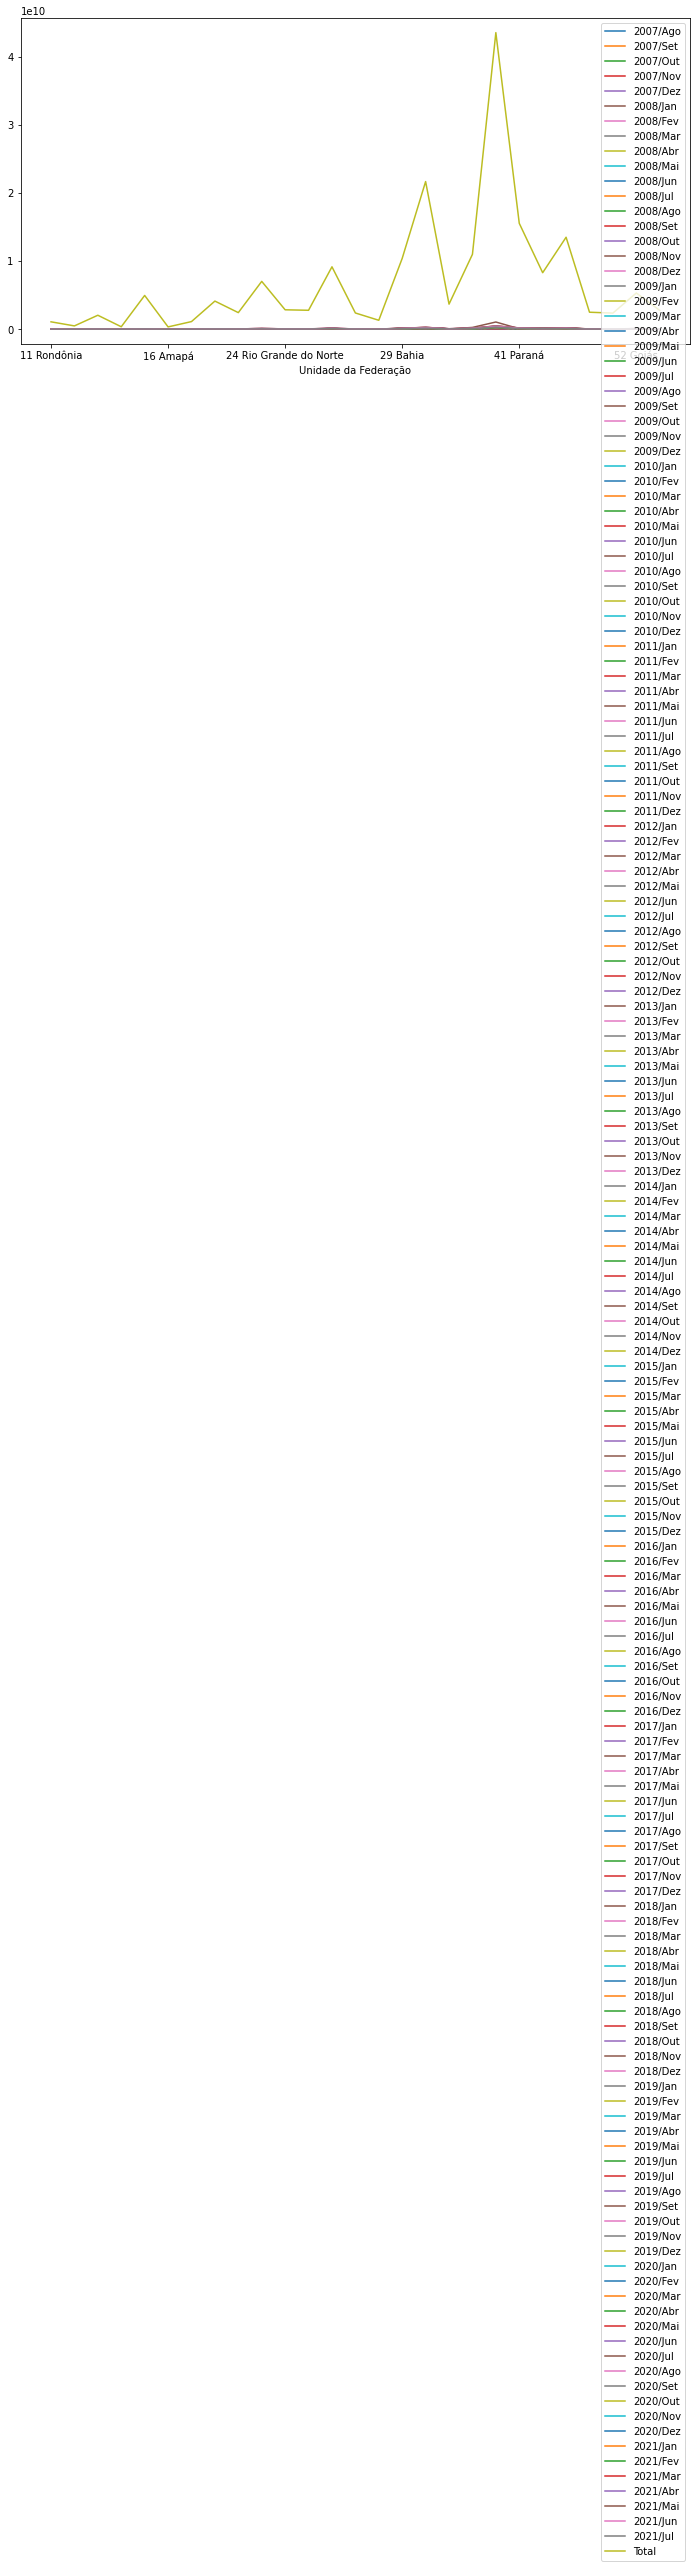

In [19]:
usaveis.plot(figsize=(12,6))

In [20]:
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2721261.19,2844811

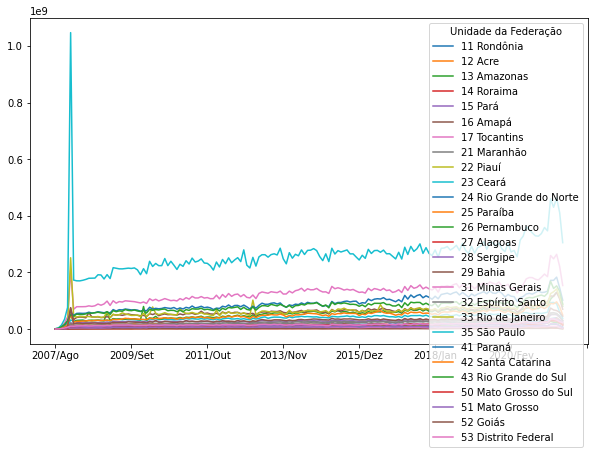

In [21]:
usaveis.T.plot(figsize=(10,6))

#Desafio: Reposicionar Legenda. Dentro? Fora? Onde?


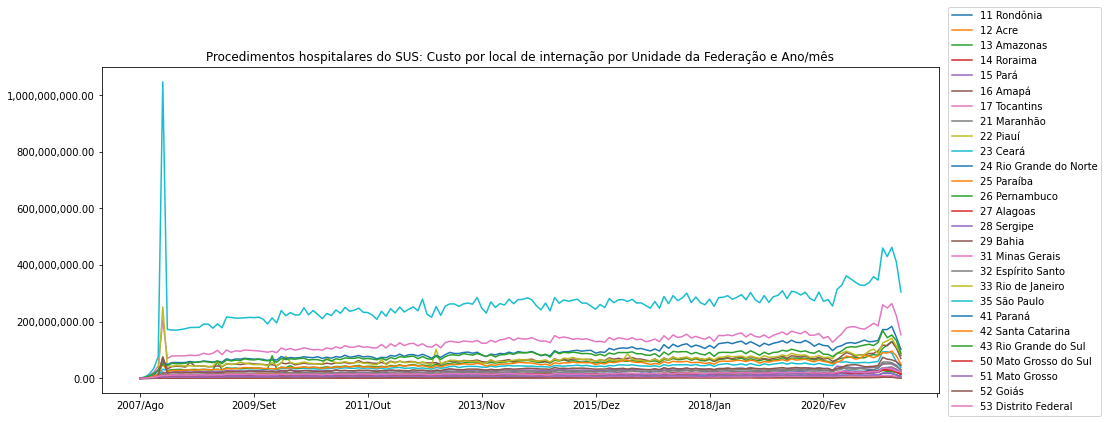

In [22]:
ax = usaveis.T.plot(figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=1, bbox_to_anchor=(1.2, 1.2))
plt.show()

# Desafio 2: Selecionar 5 estados para plota-los

## Feito por Vitor

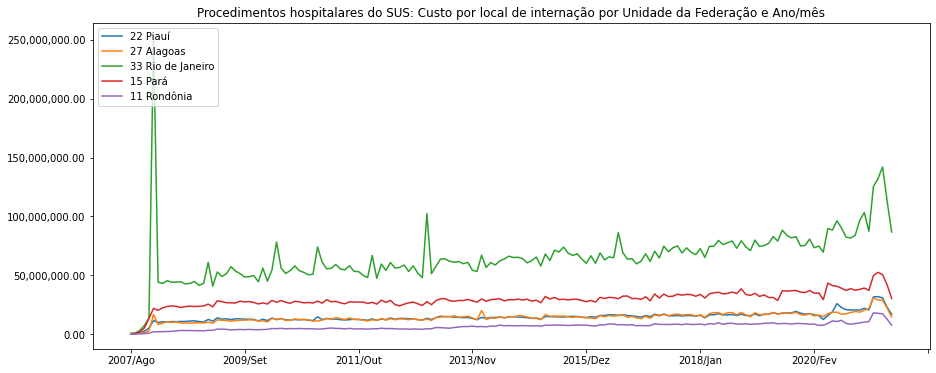

In [23]:
lista_estados = usaveis.index.tolist()
import random
CincoEstados = []
for i in range(0,5):
  n = random.choices(lista_estados)
  CincoEstados.append(n[0])

usaveis.T[CincoEstados]
ax = usaveis.T[CincoEstados].plot(figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=2)
plt.show()

## Feito na aula

In [24]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [25]:
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [26]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

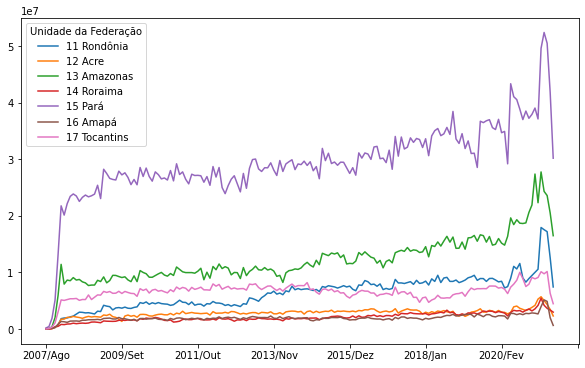

In [27]:
usaveis[:7].T.plot(figsize=(10,6))

In [28]:
import numpy as np
np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29319469.90,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31972932.63,41934293.90,36405257.36,34820715.37,35249673.88,36364662.17,42256604.54,40664905.15,39529966.31,57568004.47,57934683.92,55638184.50,42933342.84,31538501.89
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10298703.14,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,20717428.90,21991859.64,20909808.17,21544864.14,22644380.24,19926336.21,22290820.67,20445273.59,19382682.35,21171485.90,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17832372.41,20430287.05,23060407.90,28614875.56,25747404.45,25133148.37,25302778.47,24475414.14,29093489.77,27449129.52,28289286.18,37109181.01,38286278.89,40010281.03,31694725.29,19439683.31
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90

In [29]:
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,61161248.27,60108334.41,61237932.18,63709506.55,63097939.95,59369745.87,64023229.84,61587018.03,53936648.18,59452473.88,57186997.64,61547622.60,62803248.17,65855153.42,61848049.62,68759673.19,64503540.72,66115892.58,67767791.67,62660639.01,58370708.85,64710026.00,59789829.83,56978333.73,51415639.43,58105335.17,63120191.28,79475796.74,75100598.66,67887065.93,71153133.52,80859425.73,78348461.09,72801759.44,79248048.22,90645709.72,89402782.82,96380363.46,79255511.80,49791777.84
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,252069155.12,44128159.73,42906751.59,45314103.83,43951349.46,44117011.84,44360299.24,42502172.22,43066461.47,44553314.55,41351511.51,43035933.29,60886702.38,40675982.53,52753544.47,48919409.33,51183303.17,57242242.35,53485657.68,51251483.43,48495380.90,48692051.51,49723581.08,44413423.34,55993709.91,44834836.15,54474729.37,78136237.28,56044083.92,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50259682.16,...,74623086.34,79513269.64,76014274.33,77636516.06,79030149.92,72886270.52,79238302.49,74084191.59,70901145.95,79804135.17,74401906.43,75148750.59,76985732.87,82794790.54,78970111.10,88298004.54,83808834.10,81704049.84,82729809.01,74890030.81,75300599.49,80663278.09,73290794.11,74730925.86,69517218.93,89782875.19,88298261.70,96229167.91,90073416.39,82298234.47,81562341.89,83887923.76,96620041.47,103274359.27,87346547.63,125362526.18,132061458.99,141999677.53,113192764.86,86682141.36
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1046927423.80,173045862.19,170610712.81,170381376.55,172505271.19,175547012.50,179591516.72,180049847.37,180190976.

## Desafio: Mudar palet de cores para gráficos de 27 estados

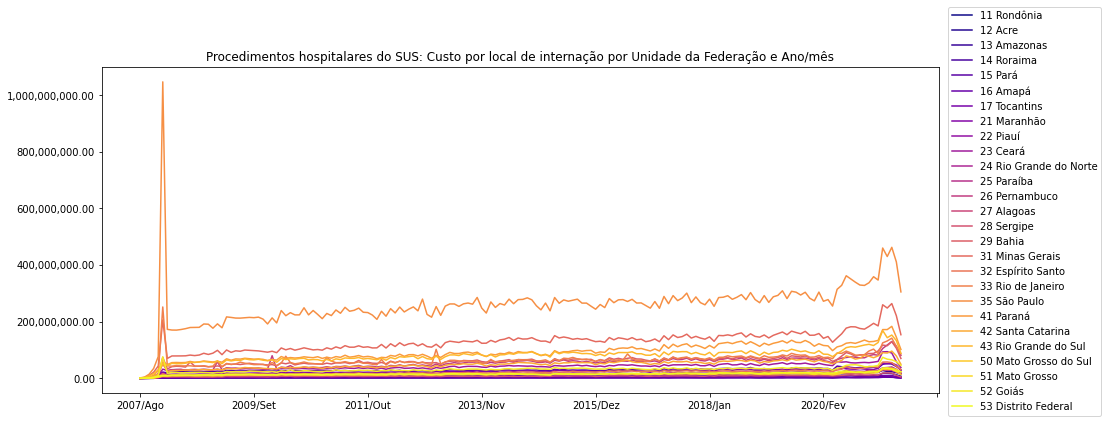

In [30]:
ax = usaveis.T.plot(figsize=(15,6), cmap = 'plasma')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=1, bbox_to_anchor=(1.2, 1.2))
plt.show()

## Desafio: adicionar uma coluna mostrando a região de cada estado

In [31]:
regiao = []
for i in range(27):
  if usaveis.index[i][0] == '1':
    regiao.append('Norte') 
  elif usaveis.index[i][0] == '2':
    regiao.append('Nordeste')
  elif usaveis.index[i][0] == '3':
    regiao.append('Sudeste')
  elif usaveis.index[i][0] == '4':
    regiao.append('Sul')
  else:
    regiao.append('Centro-Oeste')
  
# usaveis["Região"] = regiao
# cols = usaveis.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# usaveis = usaveis[cols]

In [32]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2721261.19,2844811

# Ordenação e série temporal

In [33]:
usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

regiao = []
for i in range(27):
  if ordenado_por_total.index[i][0] == '1':
    regiao.append('Norte') 
  elif ordenado_por_total.index[i][0] == '2':
    regiao.append('Nordeste')
  elif ordenado_por_total.index[i][0] == '3':
    regiao.append('Sudeste')
  elif ordenado_por_total.index[i][0] == '4':
    regiao.append('Sul')
  elif ordenado_por_total.index[i][0] == '5':
    regiao.append('Centro-Oeste')
    
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1046927423.80,173045862.19,170610712.81,170381376.55,172505271.19,175547012.50,179591516.72,180049847.37,180190976.54,191965709.27,191203869.46,177095026.47,192466571.03,178673694.74,217033832.95,215172428.64,212916020.81,212737062.37,214106868.79,215293136.77,214300043.33,216160854.31,209296748.93,192178644.40,213545203.71,195787926.41,239474479.68,221224536.51,232008764.40,224111847.69,224222550.01,249253705.77,224170156.75,239632539.36,225749095.70,...,286481016.87,291788572.30,279208974.38,286321418.71,295789304.45,277762291.06,302933615.99,278348663.52,267073072.83,292363093.11,268299673.70,288112089.02,293007729.86,309201953.43,281716110.68,307464109.69,304262824.10,294307129.46,304132810.33,282924527.81,273676445.82,304604287.43,272248732.48,278172606.85,255321714.81,314434195.45,328503334.47,362319893.79,350962262.30,339684332.88,329551515.09,328158231.54,337634767.13,358890655.96,347087924.65,460219472.23,430246974.20,462693607.78,411199321.73,305314678.98
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,124731345.17,127089756.28,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127465820.78,132614796.58,124865873.14,134747469.46,127174381.95,126210733.35,133870601.68,126221140.81,113573832.72,122331688.11,116125740.39,114786294.43,97853998.41,111039301.38,115296102.37,124136076.97,126392053.97,123622630.56,129018959.73,135278610.14,129212733.39,130331150.55,133985247.28,172256797.21,172285056.67,183675374.74,145465735.37,102067382.02
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,4589770

## Desafio: Deixar o gráfico mais bonito. A mensagem mais clara.

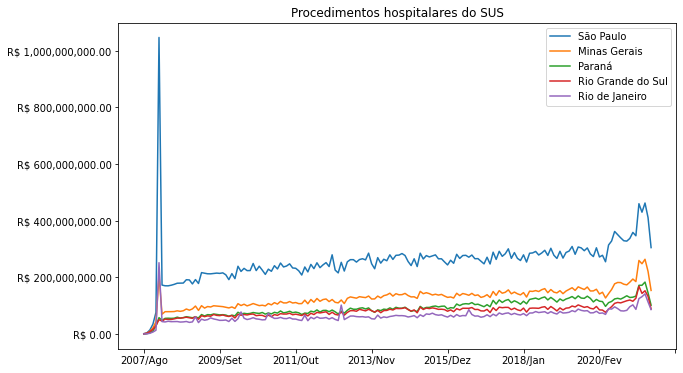

In [34]:
ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
ax.legend(loc=1)
plt.show()

## Desafio: Adicione seu estado aos 5 estados existentes e plote. Corte o ponto do gráfico mais alto.

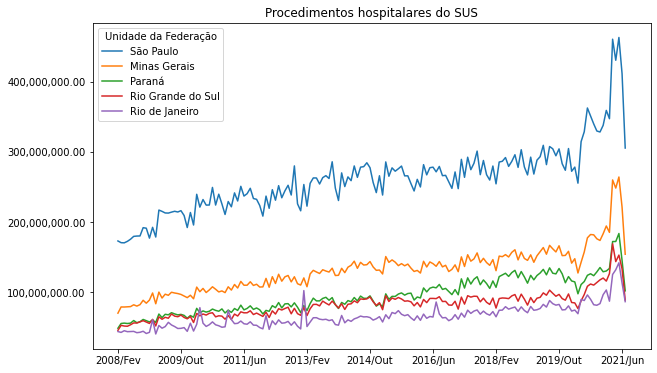

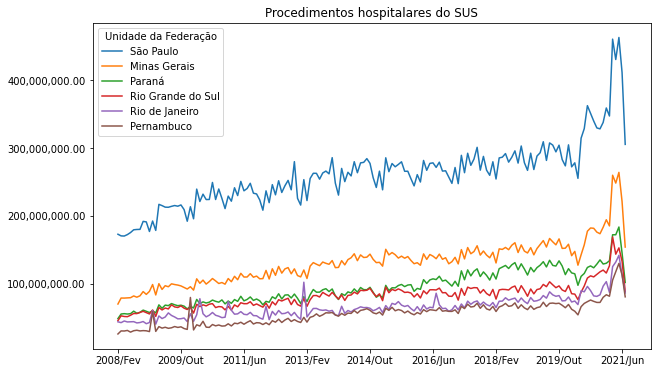

In [35]:
colunas_interessadas = ordenado_por_total.columns[6:]
ax = ordenado_por_total[colunas_interessadas].head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()

ordenado_por_total_e_PE = ordenado_por_total[colunas_interessadas].head(5).T
ordenado_por_total_e_PE['Pernambuco'] = ordenado_por_total[colunas_interessadas].T['Pernambuco']
ax = ordenado_por_total_e_PE.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()
# ordenado_por_total.T['26 Pernambuco'].plot(figsize=(10,6))


## Desafio: pesquisar os casos de dengue no Brasil e se reflete nos gastos

## Desafio: plotar só os estados do sudeste e ver se afetou com um pico em fev/2013 de forma similar nesses estados. E adicione seu estado ao estudo.

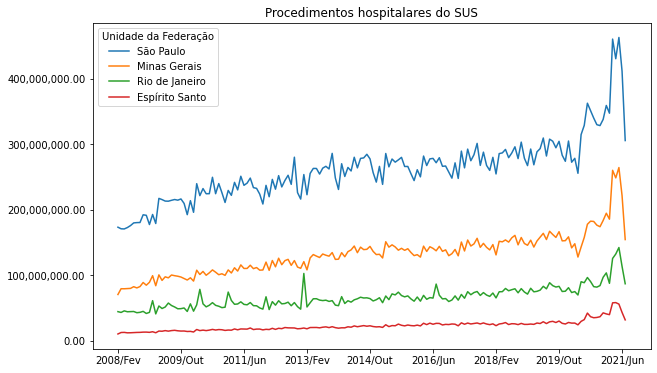

In [36]:
ordenado_mais_regiao = ordenado_por_total 
ordenado_mais_regiao["Região"] = regiao

sudeste = ordenado_mais_regiao.query('Região == "Sudeste"')
ax = sudeste[sudeste.columns[6:168]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()



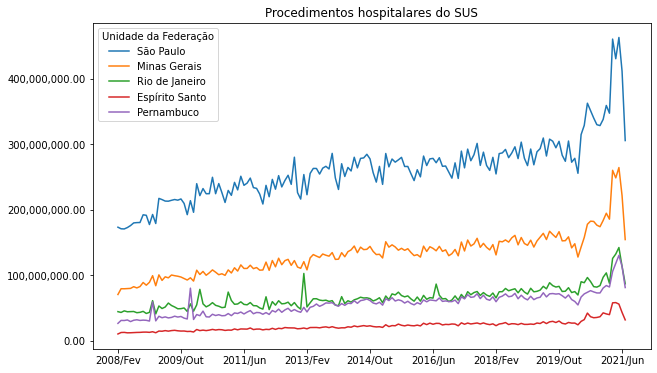

In [37]:
SE_e_PE = sudeste
SE_e_PE = SE_e_PE.append(ordenado_mais_regiao.loc['Pernambuco'])

ax = SE_e_PE[SE_e_PE.columns[6:168]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()

#Fugindo de más práticas

In [38]:
ordenado_por_total = ordenado_por_total.drop("Região", axis=1)

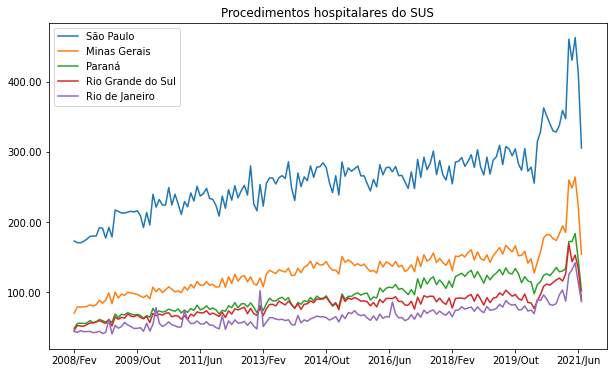

In [39]:
ordenado_por_total_milhoes = ordenado_por_total/1000000
ax = ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[6:]].head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
ax.legend(loc=0)
plt.show()

(0.0, 400.0)

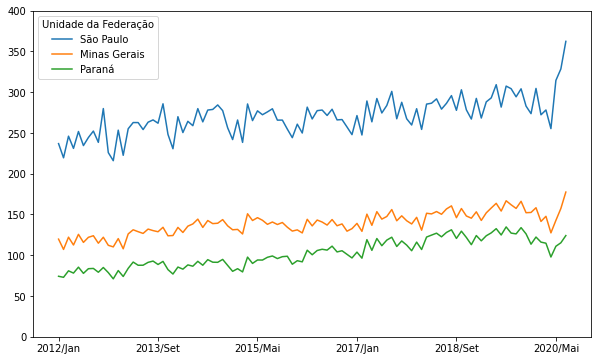

In [40]:
meses_filtrados = ordenado_por_total_milhoes.columns[53:156]
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,400)

(0.0, 500.0)

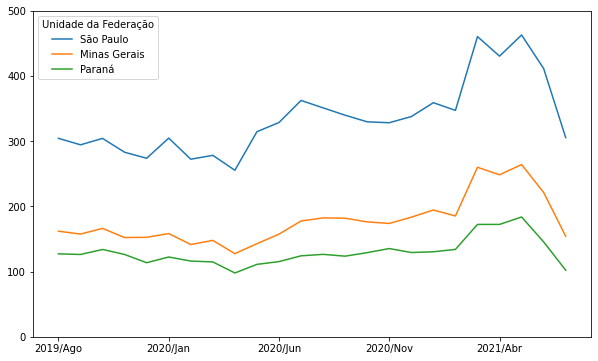

In [41]:
meses_filtrados = ordenado_por_total_milhoes.columns[-24:] #últimos 24 meses
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,500)

(0.0, 500.0)

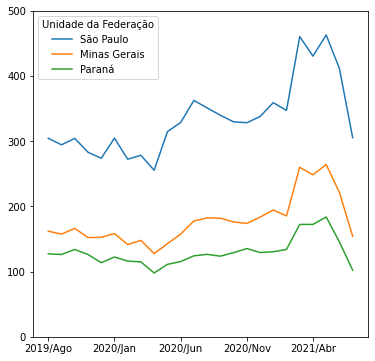

In [42]:
meses_filtrados = ordenado_por_total_milhoes.columns[-24:] #últimos 24 meses
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(6,6))
plt.ylim(0,500)

# Alternativas de vizualizações

In [43]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Jul'

In [44]:
gasto_do_ultimo_mes = ordenado_por_total[mes_mais_recente]
gasto_do_ultimo_mes.head()/1000000

Unidade da Federação
São Paulo           305.31
Minas Gerais        154.16
Paraná              102.07
Rio Grande do Sul    88.90
Rio de Janeiro       86.68
Name: 2021/Jul, dtype: float64

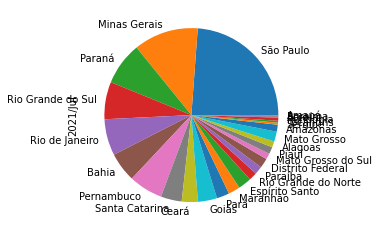

In [45]:
gasto_do_ultimo_mes.plot(kind='pie')

Horrores do gráfico de pizza:

- Legenda está horrível
- Número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico veio ordenado

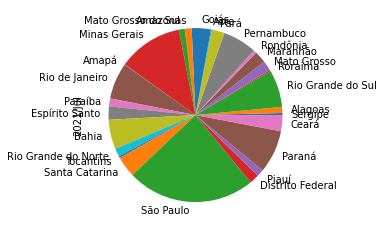

In [46]:
gasto_do_ultimo_mes.sample(frac=1).plot(kind='pie')

Horrores do gráfico de pizza:

- Legenda está horrível
- Número de fatias inacreditável
- não dá pra saber a ordem do gráfico
- cores repetidas
- muito ruim para definir ordem
- péssimo para comparar

## Desafio: Compare preço total em relação com seu estado

In [47]:
gasto_do_ultimo_mes / gasto_do_ultimo_mes.loc["Pernambuco"]

Unidade da Federação
São Paulo             3.77
Minas Gerais          1.91
Paraná                1.26
Rio Grande do Sul     1.10
Rio de Janeiro        1.07
Bahia                 0.87
Pernambuco            1.00
Santa Catarina        0.62
Ceará                 0.47
Goiás                 0.56
Pará                  0.37
Maranhão              0.35
Espírito Santo        0.39
Rio Grande do Norte   0.24
Paraíba               0.23
Distrito Federal      0.29
Mato Grosso do Sul    0.17
Piauí                 0.21
Alagoas               0.18
Mato Grosso           0.29
Amazonas              0.20
Sergipe               0.06
Tocantins             0.06
Rondônia              0.09
Acre                  0.03
Roraima               0.04
Amapá                 0.01
Name: 2021/Jul, dtype: float64

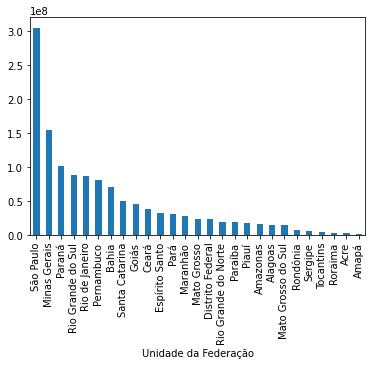

In [48]:
gasto_do_ultimo_mes.sort_values(ascending=False).plot(kind='bar')

## Desafio: documentação do matplotlib e pandas para colocar grid no gráfico

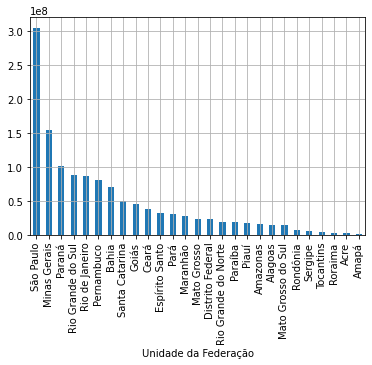

In [49]:
gasto_do_ultimo_mes.sort_values(ascending=False).plot(kind='bar', grid=True)

## Desafio: gasto do gráfico de barra em função ao seu estado

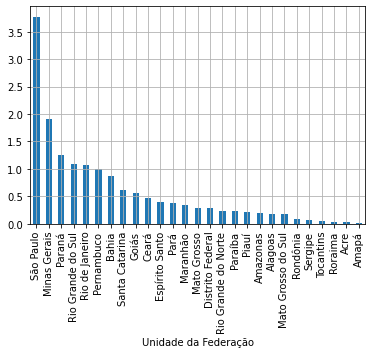

In [50]:
var_sobre_PE = gasto_do_ultimo_mes / gasto_do_ultimo_mes.loc["Pernambuco"]
var_sobre_PE.sort_values(ascending=False).plot(kind='bar', grid=True)

## Desafio: gasto por população de dois estados. Escolha dois estados. Gráfico de barras.

### Importando dados de população do Brasil

In [51]:
pop = pd.read_csv("https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Modulo02/dados/Popula%C3%A7%C3%A3o-BR/pop_filtrado.csv", sep = ";", thousands=".")
pop.head()

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brasil,172385826,174632960,176871437,181581024,184184264,186770562,183989711,189612814,191480630,190747855,192379287,193946886,201032714,202768562,204450649,206081432,207660929,208494900,210147125,211755692,213317639
1,Região Norte,13245084,13504599,13784881,14373260,14698878,15022060,14623317,15142684,15359608,15880839,16095187,16318163,16983484,17231027,17472636,17707783,17936201,18182253,18430980,18672591,18906962
2,Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278
3,Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470,906876
4,Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995


In [52]:
pop = pop.set_index("Unidades da Federação")
pop.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,
Brasil,172385826,174632960,176871437,181581024,184184264,186770562,183989711,189612814,191480630,190747855,192379287,193946886,201032714,202768562,204450649,206081432,207660929,208494900,210147125,211755692,213317639
Região Norte,13245084,13504599,13784881,14373260,14698878,15022060,14623317,15142684,15359608,15880839,16095187,16318163,16983484,17231027,17472636,17707783,17936201,18182253,18430980,18672591,18906962
Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278
Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470,906876
Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995


### Separando população de São Paulo e Pernambuco em variáveis

In [53]:
mes_pop = pop.columns[8:]
pop_filt = pop[mes_pop]
pop_SP = pop_filt.loc['São Paulo']
pop_PE = pop_filt.loc['Pernambuco']

### Manipulando dados dos procedimentos hospitalares
1- Recortando DataFrame para anos jan/2009-jul/2021

In [54]:
Proc_Hosp = dados2.replace('-', '0')
Proc_Hosp = Proc_Hosp.set_index("Unidade da Federação")
mes_pop = Proc_Hosp.columns[138:289]
Proc_Hosp = Proc_Hosp[mes_pop]
Proc_Hosp.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,4690112.05,4319488.17,4778472.22,4202805.84,4372265.77,4389025.81,4045339.34,4472721.53,4417486.20,4859795.35,4590008.82,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,2719044.65,2814550.89,2923529.36,2804546.95,2773202.98,2711168.25,2765187.44,2804275.11,2460383.33,3062146.31,2780466.09,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,9966359.03,9972847.16,9965893.92,9861030.02,10206641.46,10735915.35,8702766.18,10037664.68,8977728.10,11048686.39,10472290.40,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,1770324.67,1646157.39,1656379.50,1802450.34,1856131.44,1655521.98,1620351.06,1605536.38,1625159.47,17

2- Calculando média anual do DataFrame

In [55]:
meses_Proc_Hosp = []
j=0
for i in range(13):
  meses_Proc_Hosp.append(Proc_Hosp.columns[j:j+12].tolist())
  j+=12

j=2009
Proc_Hosp_meses = Proc_Hosp
for i in range(13):
  Proc_Hosp_meses[str(j)] = Proc_Hosp[meses_Proc_Hosp[i]].T.mean()
  j+=1

Proc_Hosp_meses = Proc_Hosp_meses[Proc_Hosp_meses.columns[151:]]
Proc_Hosp_meses.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidade da Federação,,,,,,,,,,,,,
11 Rondônia,3677817.70,4427017.73,4479232.68,4358421.26,5560790.34,6854824.25,7369002.26,7635276.84,8042011.05,8582389.71,8846500.34,9115878.38,13327156.04
12 Acre,2167568.67,2452057.73,2778669.90,2843288.37,2815335.95,2985682.65,3101025.42,3241594.67,3206753.17,2916995.56,2964647.08,3374905.93,4321118.89
13 Amazonas,8874276.31,9514648.10,10021942.83,10243071.67,10366240.86,10471084.75,12662660.83,12382893.72,13491196.80,14892281.98,15697681.85,18192518.30,23190055.00
14 Roraima,1410823.25,1751623.94,1597297.11,1677618.38,1749413.43,1798447.37,2021151.40,2261175.49,2620584.07,2785624.39,2881339.87,3072105.70,3904464.33
15 Pará,26544531.82,26956286.18,27096465.01,26173104.47,28196737.32,29055716.68,29210662.30,30257858.59,32350059.25,34357026.75,34002661.77,37522389.26,42944942.55


3-Filtrando os custos para São Paulo e Pernambuco

In [56]:
Proc_Hosp_SP = Proc_Hosp_meses.loc['35 São Paulo']
Proc_Hosp_PE = Proc_Hosp_meses.loc['26 Pernambuco']

4-Calculando o Custo per capta de cada mês e concatenando DataSeries em um DataFrame

In [57]:
Custo_Per_cap_SP = Proc_Hosp_SP.rename("São Paulo") / pop_SP
Custo_Per_cap_PE = Proc_Hosp_PE.rename("Pernambuco") / pop_PE
Custo_Per_cap = pd.concat([Custo_Per_cap_SP.T, Custo_Per_cap_PE.T], axis=1)
Custo_Per_cap.head()

,São Paulo,Pernambuco
2009,5.01,4.20
2010,5.45,4.74
2011,5.60,4.72
2012,5.72,5.03
2013,5.85,5.78


5- Plot dos dados

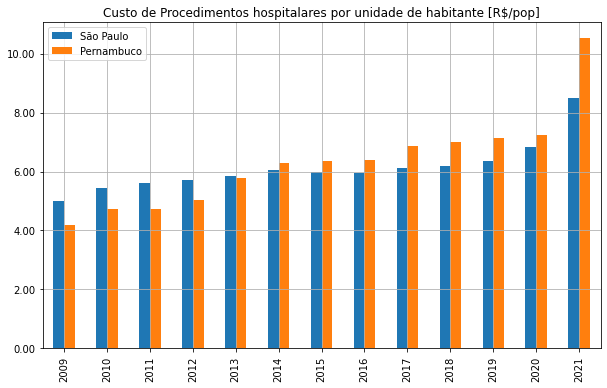

In [58]:
ax = Custo_Per_cap.plot(figsize=(10,6), grid=True, kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Custo de Procedimentos hospitalares por unidade de habitante [R$/pop]")
ax.legend(loc=0)
plt.show()

## Desafio: Explore e levante hipóteses e perguntas.

## Super Desafio: Escolha outro valor fora Valor aprovado no TABNET e explore.

#MÓDULO 2
---

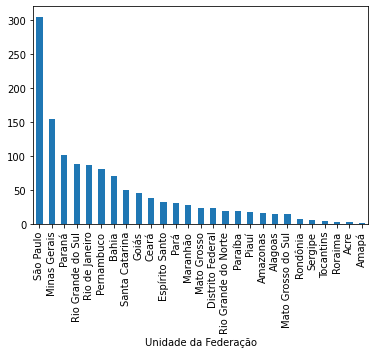

In [59]:
gastos_do_mais_recente = gasto_do_ultimo_mes/1000000
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

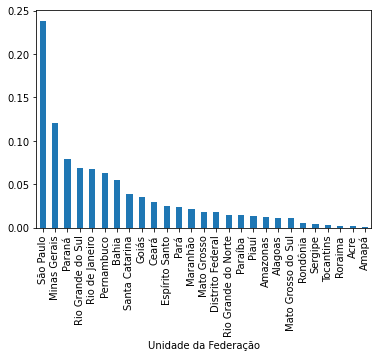

In [60]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

In [61]:
ibge_estimativa = pd.read_excel("https://github.com/VitorFRodrigues/Data-Science-Bootcamp/raw/main/Modulo02/dados/POP2021_20211029.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,213317639
2,Região Norte,nan,18906962
3,Rondônia,nan,1815278
4,Acre,nan,906876


In [62]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 649 132	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)"""

#fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [63]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

pop_wiki = pd.read_csv(dados_da_populacao_io, sep="\t")
pop_wiki.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 649 132,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 985 284,"7,1%",Chade (14 037 000)


### Desafio: Ler arquivo direto do Wikipedia (html).

In [64]:
pop_html_wikipedia = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
pop_html_wiki = pop_html_wikipedia[0]
pop_html_wiki.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 649 132,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 985 284,"7,1%",Chade (14 037 000)
4,5,Paraná,11 597 484,"5,4%",Bolívia (11 410 651)


### Desafio: Filtrar ultimo dataframe:
  - Transformar "Unidade da Federação" em "uf"
  - Transformar "População" em "populacao"
  - População precisa ser transformado para número
  - Retirar linhas sem sentido
  - Transformar uf como índice

In [65]:
pop_wiki = pop_wiki.rename(columns={'Unidade federativa':'uf', 'População': 'populacao'}, inplace= False)
pop_wiki = pop_wiki.dropna()
pop_wiki['populacao'] = pop_wiki['populacao'].str.replace(' ','').astype(int)
pop_wiki = pop_wiki.drop(['% da pop. total', 'País comparável', 'Posição'], axis=1)
pop_wiki = pop_wiki.set_index('uf')
display(pop_wiki)
display(pop_wiki.info())


,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484
Rio Grande do Sul,11466630
Pernambuco,9674793
Ceará,9240580
Pará Pará,8777124


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [66]:
pop_html_wiki['Unidade federativa'].str[:3]

0     São
1     Min
2     Rio
3     Bah
4     Par
5     Rio
6     Per
7     Cea
8     Par
9     San
10    Goi
11    Mar
12    Ama
13    Esp
14    Par
15    Mat
16    Rio
17    Ala
18    Pia
19    Dis
20    Mat
21    Ser
22    Ron
23    Toc
24    Acr
25    Ama
26    Ror
Name: Unidade federativa, dtype: object

In [67]:
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           305.31
Minas Gerais        154.16
Paraná              102.07
Rio Grande do Sul    88.90
Rio de Janeiro       86.68
Name: 2021/Jul, dtype: float64

In [68]:
pop_wiki.index = pop_wiki.index.str.strip()

In [69]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  pop_wiki.index = pop_wiki.index.str.replace(f"{estado} {estado}", estado)
pop_wiki.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [70]:
gastos_e_pop_recente = pop_wiki.join(gastos_do_mais_recente)
gastos_e_pop_recente

,populacao,2021/Jul
uf,,
São Paulo,46649132,305.31
Minas Gerais,21411923,154.16
Rio de Janeiro,17463349,86.68
Bahia,14985284,70.23
Paraná,11597484,102.07
Rio Grande do Sul,11466630,88.90
Pernambuco,9674793,80.91
Ceará,9240580,38.29
Pará,8777124,30.18


### Desafio: explorar mais métodos de String do python e str do pandas

### Desafio: estruturar uma função para a leitura e limpeza desta tabela, devoltendo a tabela de pop_wiki e tabela unida

In [71]:
def ler_tabelas_str(pop, gastos):
  pop = pop.rename(columns={'Unidade federativa':'uf', 'População': 'populacao'}, inplace= False)
  pop = pop.dropna()
  pop['populacao'] = pop['populacao'].str.replace(' ','').astype(int)
  pop = pop.drop(['% da pop. total', 'País comparável', 'Posição'], axis=1)
  pop = pop.set_index('uf')

  # gastos.index = gastos.index.str[3:]
  pop.index = pop.index.str.strip()
  
  for estado in gastos.index:
    pop.index = pop.index.str.replace(f"{estado} {estado}", estado)

  unida = pop
  unida = unida.join(gastos)
  return pop, unida

In [72]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 649 132	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)"""

#fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [73]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

pop_desafio = pd.read_csv(dados_da_populacao_io, sep="\t")
pop_desafio.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 649 132,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 985 284,"7,1%",Chade (14 037 000)


In [74]:
populacao, unidas = ler_tabelas_str(pop_desafio, gastos_do_mais_recente)
display(populacao)
display(unidas)

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia,14985284
Paraná,11597484
Rio Grande do Sul,11466630
Pernambuco,9674793
Ceará,9240580
Pará,8777124


,populacao,2021/Jul
uf,,
São Paulo,46649132,305.31
Minas Gerais,21411923,154.16
Rio de Janeiro,17463349,86.68
Bahia,14985284,70.23
Paraná,11597484,102.07
Rio Grande do Sul,11466630,88.90
Pernambuco,9674793,80.91
Ceará,9240580,38.29
Pará,8777124,30.18


In [75]:
gastos_e_pop_recente.head()

,populacao,2021/Jul
uf,,
São Paulo,46649132,305.31
Minas Gerais,21411923,154.16
Rio de Janeiro,17463349,86.68
Bahia,14985284,70.23
Paraná,11597484,102.07


In [76]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]


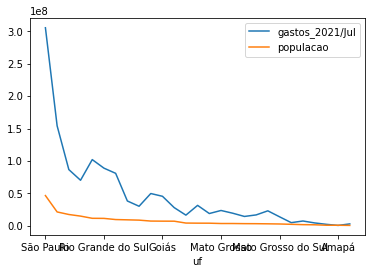

In [77]:
# Horripilante (data vizualization)
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_pop_recente, "2021/Jul")
# gastos_e_pop_recente["gastos"] = gastos_e_pop_recente["2021/Jul"] * 1000000
gastos_e_pop_recente[["gastos_2021/Jul", "populacao"]].plot()

In [78]:
gastos_e_pop_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,populacao,2021/Jul,gastos_2021/Jul,gasto_por_habitante_2021/Jul
uf,,,,
Rio Grande do Sul,11466630,88.90,88897808.64,7.75
São Paulo,46649132,305.31,305314678.98,6.54


In [79]:
RS_por_hab = 88897808.64 / 11466630
SP_por_hab = 305314678.98 / 46649132
display(RS_por_hab)
display(SP_por_hab)

7.752740660507926

6.544916612381984

In [80]:
gastos_e_pop_recente.head()

,populacao,2021/Jul,gastos_2021/Jul,gasto_por_habitante_2021/Jul
uf,,,,
São Paulo,46649132,305.31,305314678.98,6.54
Minas Gerais,21411923,154.16,154160802.91,7.20
Rio de Janeiro,17463349,86.68,86682141.36,4.96
Bahia,14985284,70.23,70232597.61,4.69
Paraná,11597484,102.07,102067382.02,8.80


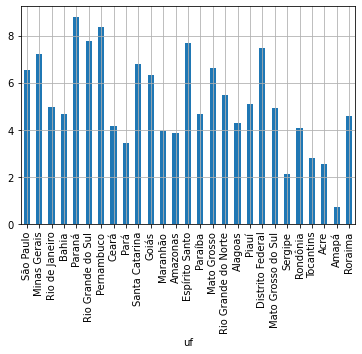

In [81]:
gastos_e_pop_recente["gasto_por_habitante_2021/Jul"].plot(kind='bar', grid=True)
#Se eu ploto o gráfico sem ordenar, mostro ao usuário o gasto por habitante dos
# estados que possuem valores absolutos ordenados

### Desafio: Ordenar último gráfico por gasto por habitante. E Ordene por número de habitantes.

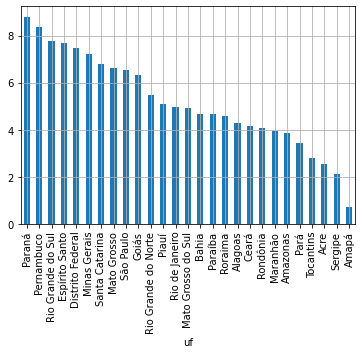

In [82]:
gastos_e_pop_recente["gasto_por_habitante_2021/Jul"].sort_values(ascending=False).plot(kind='bar', grid=True)

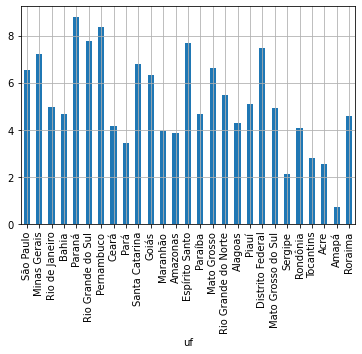

In [83]:
gastos_e_pop_recente.sort_values(by=["populacao"], ascending=False)["gasto_por_habitante_2021/Jul"].plot(kind='bar', grid=True)

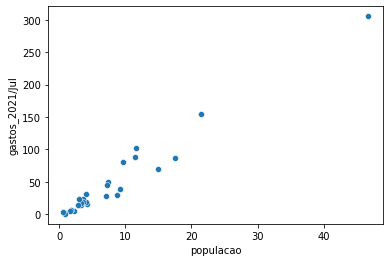

In [84]:
import seaborn as sns

sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Jul")

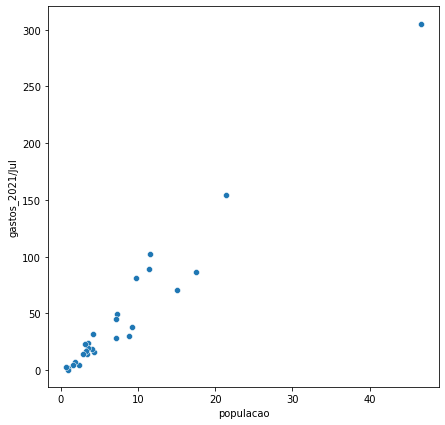

In [85]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Jul")

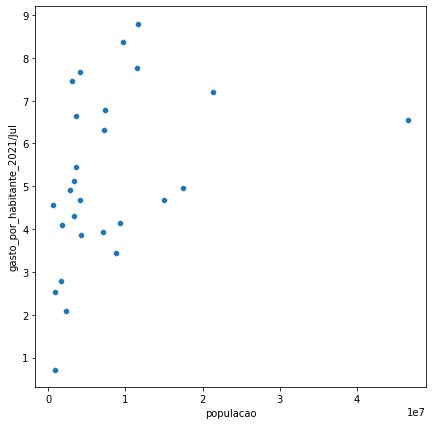

In [86]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente, x="populacao", y="gasto_por_habitante_2021/Jul")

### Desafio: Fazer os últimos gráficos para o mês anterior a este.

In [87]:
# ordenado_por_total.index = ordenado_por_total.index.str[3:]
# ordenado_por_total["2021/Jun"].head()

In [88]:
# gastos_e_pop_recente["2021/Jun"] = ordenado_por_total["2021/Jun"]
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_pop_recente, "2021/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_pop_recente, "2021/Mai")
gastos_e_pop_recente.head()

,populacao,2021/Jul,gastos_2021/Jul,gasto_por_habitante_2021/Jul,gastos_2021/Jun,gasto_por_habitante_2021/Jun,gastos_2021/Mai,gasto_por_habitante_2021/Mai
uf,,,,,,,,
São Paulo,46649132,305.31,305314678.98,6.54,411199321.73,8.81,462693607.78,9.92
Minas Gerais,21411923,154.16,154160802.91,7.20,221215255.11,10.33,264091544.11,12.33
Rio de Janeiro,17463349,86.68,86682141.36,4.96,113192764.86,6.48,141999677.53,8.13
Bahia,14985284,70.23,70232597.61,4.69,106499143.90,7.11,129578490.27,8.65
Paraná,11597484,102.07,102067382.02,8.80,145465735.37,12.54,183675374.74,15.84


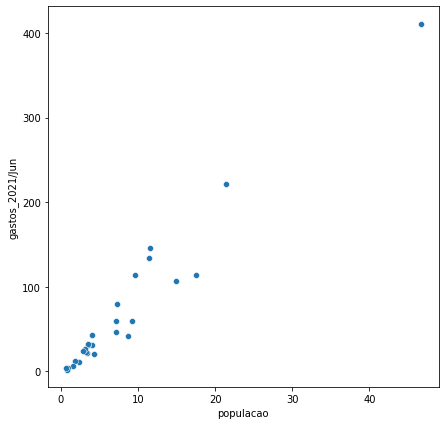

In [89]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Jun")

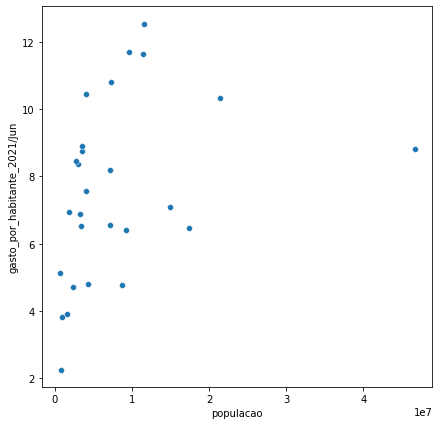

In [90]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente, x="populacao", y="gasto_por_habitante_2021/Jun")

### Desafio: Plota no mesmo gráfico, mes anterior e atual.

In [91]:
gastos_e_pop_recente.head()

,populacao,2021/Jul,gastos_2021/Jul,gasto_por_habitante_2021/Jul,gastos_2021/Jun,gasto_por_habitante_2021/Jun,gastos_2021/Mai,gasto_por_habitante_2021/Mai
uf,,,,,,,,
São Paulo,46649132,305.31,305314678.98,6.54,411199321.73,8.81,462693607.78,9.92
Minas Gerais,21411923,154.16,154160802.91,7.20,221215255.11,10.33,264091544.11,12.33
Rio de Janeiro,17463349,86.68,86682141.36,4.96,113192764.86,6.48,141999677.53,8.13
Bahia,14985284,70.23,70232597.61,4.69,106499143.90,7.11,129578490.27,8.65
Paraná,11597484,102.07,102067382.02,8.80,145465735.37,12.54,183675374.74,15.84


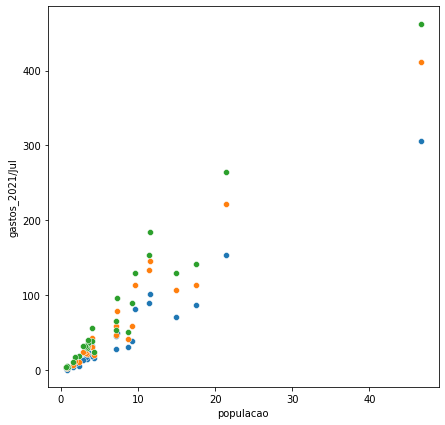

In [92]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Jul")
sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Jun")
sns.scatterplot(data=gastos_e_pop_recente/1000000, x="populacao", y="gastos_2021/Mai")

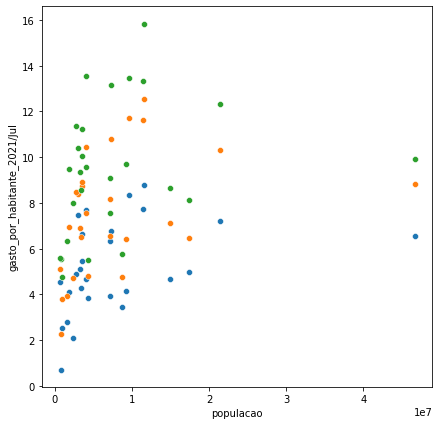

In [93]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_pop_recente, x="populacao", y="gasto_por_habitante_2021/Jul")
sns.scatterplot(data=gastos_e_pop_recente, x="populacao", y="gasto_por_habitante_2021/Jun")
sns.scatterplot(data=gastos_e_pop_recente, x="populacao", y="gasto_por_habitante_2021/Mai")

### Desafio: Analise os Gráficos e tente chegar a hióteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

In [94]:
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total = ordenado_por_total.drop(["2007/Ago", "2007/Set", "2007/Out", "2007/Nov", "2007/Dez", "2008/Jan"], axis=1)
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,173.05,170.61,170.38,172.51,175.55,179.59,180.05,180.19,191.97,191.20,177.10,192.47,178.67,217.03,215.17,212.92,212.74,214.11,215.29,214.30,216.16,209.30,192.18,213.55,195.79,239.47,221.22,232.01,224.11,224.22,249.25,224.17,239.63,225.75,210.78,229.18,221.69,241.48,229.97,250.83,...,286.48,291.79,279.21,286.32,295.79,277.76,302.93,278.35,267.07,292.36,268.30,288.11,293.01,309.20,281.72,307.46,304.26,294.31,304.13,282.92,273.68,304.60,272.25,278.17,255.32,314.43,328.50,362.32,350.96,339.68,329.55,328.16,337.63,358.89,347.09,460.22,430.25,462.69,411.20,305.31
Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.22,80.37,82.42,88.61,84.49,88.93,99.02,83.68,100.27,91.83,97.29,95.72,100.05,99.00,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.84,105.50,99.67,103.38,107.84,104.34,100.53,101.94,99.54,107.81,103.17,111.10,106.09,115.49,...,150.71,153.61,150.27,156.81,160.56,146.10,157.30,148.17,145.46,153.28,142.72,152.00,157.96,163.69,154.21,166.82,161.89,157.46,166.20,152.19,152.50,158.30,141.47,147.78,127.47,142.76,157.36,177.51,182.25,181.80,176.16,173.79,183.34,194.37,185.29,259.90,248.33,264.09,221.22,154.16
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,124.73,127.09,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.47,132.61,124.87,134.75,127.17,126.21,133.87,126.22,113.57,122.33,116.13,114.79,97.85,111.04,115.30,124.14,126.39,123.62,129.02,135.28,129.21,130.33,133.99,172.26,172.29,183.68,145.47,102.07
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.15,95.86,103.04,98.57,94.37,96.99,91.01,88.77,97.63,85.49,84.89,76.83,87.81,96.82,108.56,111.79,110.21,114.03,117.68,120.28,115.94,126.64,169.01,143.67,152.96,133.41,88.90
Rio de Janeiro,44.13,42.91,45.31,43.95,44.12,44.36,42.50,43.07,44.55,41.35,43.04,60.89,40.68,52.75,48.92,51.18,57.24,53.49,51.25,48.50,48.69,49.72,44.41,55.99,44.83,54.47,78.14,56.04,51.44,53.87,57.87,53.74,52.38,50.26,50.89,74.01,61.17,55.36,55.82,59.09,...,74.62,79.51,76.01,77.64,79.03,72.89,79.24,74.08,70.90,79.80,74.40,75.15,76.99,82.79,78.97,88.30,83.81,81.70,82.73,74.89,75.30,80.66,73.29,74.73,69.52,89.78,88.30,96.23,90.07,82.30,81.56,83.89,96.62,103.27,87.35,125.36,132.06,142.00,113.19,86.68


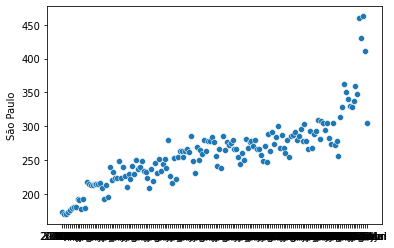

In [95]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

In [96]:
mensal=ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,173.05,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.61,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.38,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.51,79.27,55.57,51.68,43.95,42.10,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.55,79.63,56.09,53.76,44.12,39.91,28.95,28.99,29.46,20.39,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.31,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


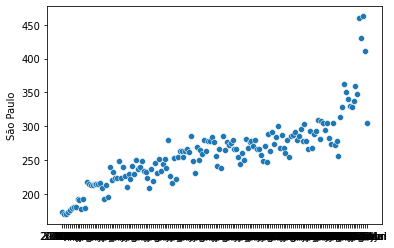

In [97]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

### Desafio: Use o seu estado

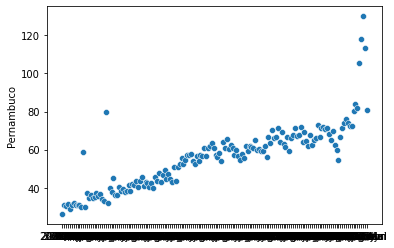

In [98]:
sns.scatterplot(data=mensal, x=mensal.index, y="Pernambuco")

### Desafio: Formatar o eixo y com StrMethodFormatter, colocar um título e colocar título nos 2 eixos e alterar fonte (tamanho) dos títulos

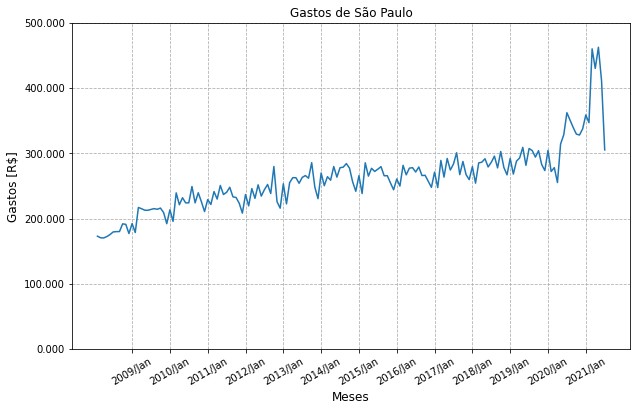

In [99]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.3f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.ylim(0, 500)
plt.xticks(rotation=30)
plt.grid(linestyle="--")
fonte = 12
plt.title("Gastos de São Paulo", fontsize=fonte)
plt.ylabel("Gastos [R$]", fontsize=fonte)
plt.xlabel("Meses", fontsize=fonte)
plt.show()

In [100]:
from datetime import date

meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12,
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,173.05,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.61,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.38,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.51,79.27,55.57,51.68,43.95,42.10,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.55,79.63,56.09,53.76,44.12,39.91,28.95,28.99,29.46,20.39,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.31,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


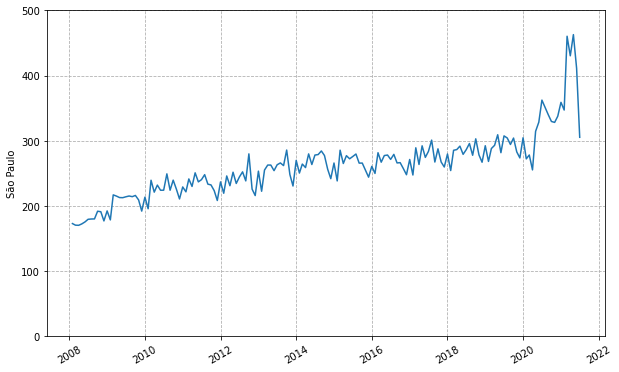

In [101]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 500)
plt.grid(linestyle="--")
plt.show()

In [102]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 2008-02-01 to 2021-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            162 non-null    float64
 1   Minas Gerais         162 non-null    float64
 2   Paraná               162 non-null    float64
 3   Rio Grande do Sul    162 non-null    float64
 4   Rio de Janeiro       162 non-null    float64
 5   Bahia                162 non-null    float64
 6   Pernambuco           162 non-null    float64
 7   Santa Catarina       162 non-null    float64
 8   Ceará                162 non-null    float64
 9   Goiás                162 non-null    float64
 10  Pará                 162 non-null    float64
 11  Maranhão             162 non-null    float64
 12  Espírito Santo       162 non-null    float64
 13  Rio Grande do Norte  162 non-null    float64
 14  Paraíba              162 non-null    float64
 15  Distrito Federal     162 non-

In [103]:
mensal.index[0]

datetime.date(2008, 2, 1)

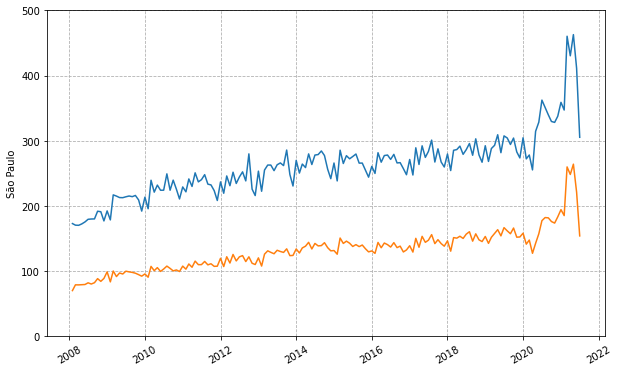

In [104]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 500)
plt.grid(linestyle="--")
plt.show()

# problemas
# 1. eixos;
# 2. legenda;
# 3. serio mesmo? copy e paste das linhas do gráfico?

```
MES        VALOR     ESTADO 
2008-03    170.48    Sao Paulo
2008-03    79.12     Minas Gerais
```

In [105]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,173.05
1,2008-03-01,São Paulo,170.61
2,2008-04-01,São Paulo,170.38
3,2008-05-01,São Paulo,172.51
4,2008-06-01,São Paulo,175.55


### Desafio: voltar atrás... partindo do `mensal_aberto` chegar no `mensal`

In [106]:
mensal_aberto.pivot(index='mes', columns='uf').head()

gasto                ...                            
uf          Acre Alagoas Amapá  ... Sergipe São Paulo Tocantins
mes                             ...                            
2008-02-01  1.74    8.11  1.28  ...    4.64    173.05      5.05
2008-03-01  2.06    9.21  1.18  ...    5.02    170.61      5.20
2008-04-01  2.06   10.47  1.40  ...    5.27    170.38      5.34
2008-05-01  2.23    9.84  1.41  ...    5.37    172.51      5.34
2008-06-01  2.11   10.31  1.42  ...    4.98    175.55      5.40

[5 rows x 27 columns]

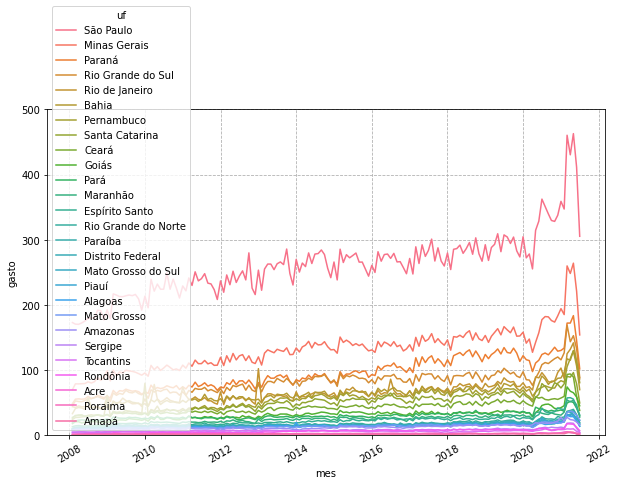

In [107]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 500)
plt.grid(linestyle="--")
plt.show()

### Desafio: melhorar este gráfico.

- muitos estados, escolha os estados
- palete de cores: https://seaborn.pydata.org/tutorial/color_palettes.html (27 cores?)
- posição da legenda
- titulo e título dos eixos

In [108]:
Regiao_UFs = {
    "Acre": "Norte",
    "Amapá": "Norte",
    "Amazonas": "Norte",
    "Pará": "Norte",
    "Rondônia": "Norte",
    "Roraima": "Norte",
    "Tocantins": "Norte",
    "Alagoas": "Nordeste",
    "Bahia": "Nordeste",
    "Ceará": "Nordeste",
    "Maranhão": "Nordeste",
    "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste",
    "Piauí": "Nordeste",
    "Rio Grande do Norte": "Nordeste",
    "Sergipe": 'Nordeste',
    "Goiás": "Centro-Oeste",
    "Mato Grosso": "Centro-Oeste",
    "Mato Grosso do Sul": "Centro-Oeste",
    "Distrito Federal": "Centro-Oeste",
    "Espírito Santo": "Sudeste",
    "Minas Gerais": "Sudeste",
    "Rio de Janeiro": "Sudeste",
    "São Paulo": "Sudeste",
    "Paraná": "Sul",
    "Rio Grande do Sul": "Sul",
    "Santa Catarina": "Sul"
}

In [109]:
mensal_regioes = mensal

In [110]:
def para_regiao(estado: str):
  regiao = Regiao_UFs[estado]
  return regiao

mensal_regioes.columns = mensal_regioes.columns.map(para_regiao)
mensal_regioes.head()

Unidade da Federação,Sudeste,Sudeste,Sul,Sul,Sudeste,Nordeste,Nordeste,Sul,Nordeste,Centro-Oeste,Norte,Nordeste,Sudeste,Nordeste,Nordeste,Centro-Oeste,Centro-Oeste,Nordeste,Nordeste,Centro-Oeste,Norte,Nordeste,Norte,Norte,Norte,Norte,Norte
2008-02-01,173.05,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.61,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.38,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.51,79.27,55.57,51.68,43.95,42.10,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.55,79.63,56.09,53.76,44.12,39.91,28.95,28.99,29.46,20.39,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.31,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [111]:
mensal_regioes = mensal_regioes.T.reset_index().groupby('Unidade da Federação').sum().T
mensal_regioes.head()

Unidade da Federação,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
2008-02-01,44.57,143.17,38.84,297.51,119.16
2008-03-01,51.83,164.01,42.06,304.90,136.02
2008-04-01,51.36,169.55,43.81,307.20,135.89
2008-05-01,50.28,169.32,45.23,307.51,135.61
2008-06-01,52.07,161.33,44.64,311.18,138.85


In [112]:
mensal_regioes_aberto = mensal_regioes.reset_index().melt(id_vars=["index"], value_vars=mensal_regioes.columns)
mensal_regioes_aberto.columns = ["mes", "regioes", "gasto"]
mensal_regioes_aberto.head()

,mes,regioes,gasto
0,2008-02-01,Centro-Oeste,44.57
1,2008-03-01,Centro-Oeste,51.83
2,2008-04-01,Centro-Oeste,51.36
3,2008-05-01,Centro-Oeste,50.28
4,2008-06-01,Centro-Oeste,52.07


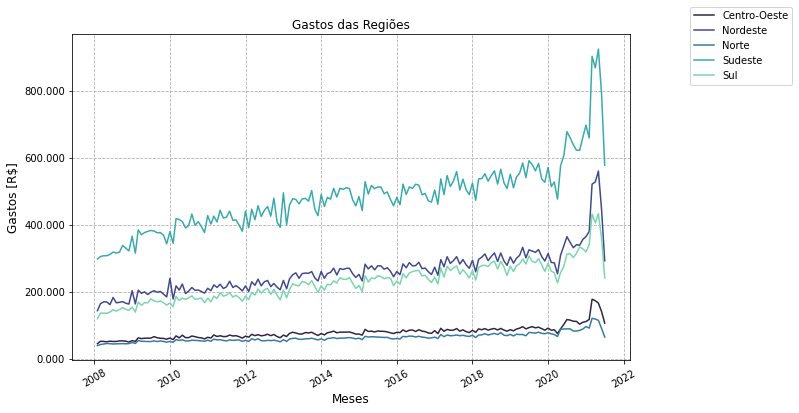

In [115]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_regioes_aberto, x="mes", y="gasto", hue="regioes", palette = "mako")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.3f}"))
ax.legend(loc=1, bbox_to_anchor=(1.3, 1.1))

fonte = 12
plt.title("Gastos das Regiões", fontsize=fonte)
plt.ylabel("Gastos [R$]", fontsize=fonte)
plt.xlabel("Meses", fontsize=fonte)
plt.xticks(rotation=30)
plt.grid(linestyle="--")

plt.show()